Decision Tree Classifier Doc: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

Bagging Classifier Doc: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html

Random Forest Classifier Doc: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [54]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import make_classification, make_blobs

In [55]:
# Make data set where we can control dependencies
X, y = make_blobs(n_samples=1000, n_features=2, centers=[[1,1], [-1, -1], [1, 0]], cluster_std=0.6, random_state=0)

X, y = make_classification(n_samples=1000, n_classes=3, n_features=4,
                           n_informative=3, n_redundant=1,
                           random_state=0, shuffle=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [56]:
# Decision tree code
dt = DecisionTreeClassifier(random_state=0)
CV_dt = cross_val_score(dt, X_train, y_train, cv=10)

In [57]:
# Bagging code
bagging = BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5, max_features=0.5)
CV_bagging = cross_val_score(bagging, X_train, y_train, cv=10)

In [58]:
# Random Forest code
rf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
rf.fit(X, y)  
#print(rf.feature_importances_)
CV_rf = cross_val_score(rf, X_train, y_train, cv=10)

What do you notice about the time it takes to run each of these classifiers?

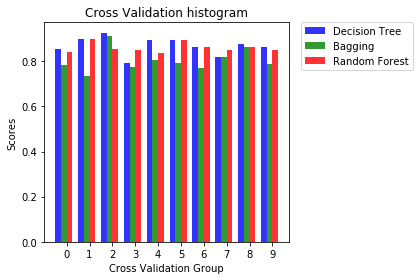

In [59]:
# Cross Validation Plot
fig, ax = plt.subplots()
index = numpy.arange(10)
bar_width = 0.25
opacity = 0.8

rects1 = plt.bar(index, CV_dt, bar_width,alpha=opacity,color='b',label='Decision Tree')
rects2 = plt.bar(index + bar_width, CV_bagging, bar_width,alpha=opacity,color='g',label='Bagging')
rects3 = plt.bar(index + 2*bar_width, CV_rf, bar_width,alpha=opacity,color='r',label='Random Forest')

plt.xlabel('Cross Validation Group')
plt.ylabel('Scores')
plt.title('Cross Validation histogram')
plt.xticks(index + 1.5*bar_width, numpy.arange(10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.tight_layout()
plt.show()

1) Try limiting the depth of the decision tree

2) Try limiting the number of samples relative to the number of features

3) 

DecisionTree with features [0, 1] has a score of 1.0
Bagging with 10 estimators with features [0, 1] has a score of 0.9328358208955224
RandomForest with 30 estimators with features [0, 1] has a score of 1.0
DecisionTree with features [0, 2] has a score of 1.0
Bagging with 10 estimators with features [0, 2] has a score of 0.8835820895522388
RandomForest with 30 estimators with features [0, 2] has a score of 0.9970149253731343
DecisionTree with features [2, 3] has a score of 1.0
Bagging with 10 estimators with features [2, 3] has a score of 0.8731343283582089
RandomForest with 30 estimators with features [2, 3] has a score of 1.0
DecisionTree with features [0, 3] has a score of 1.0
Bagging with 10 estimators with features [0, 3] has a score of 0.8820895522388059
RandomForest with 30 estimators with features [0, 3] has a score of 0.9985074626865672
DecisionTree with features [1, 3] has a score of 1.0
Bagging with 10 estimators with features [1, 3] has a score of 0.8940298507462686
RandomF

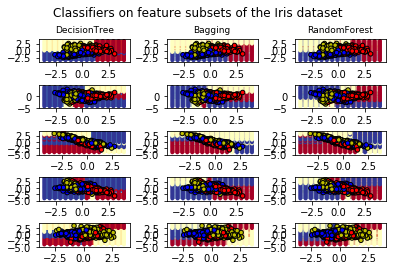

In [70]:
from matplotlib.colors import ListedColormap
# Parameters
n_classes = 3
n_estimators = 30
cmap = plt.cm.RdYlBu
plot_step = 0.02  # fine step width for decision surface contours
plot_step_coarser = 0.5  # step widths for coarse classifier guesses
RANDOM_SEED = 42  # fix the seed on each iteration
plot_idx = 1

# Design test data set
X, y = make_classification(n_samples=1000, n_classes=3, n_features=4,
                           n_informative=3, n_redundant=1,
                           random_state=0, shuffle=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


models = [DecisionTreeClassifier(max_depth=None),
          BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5),
          RandomForestClassifier(n_estimators=30)]

views = ([0, 1], [0, 2], [2, 3], [0,3], [1,3])

for pair in views:
    for model in models:
        # We only take the two corresponding features
        X = X_train[:, pair]
        y = y_train

        # Shuffle
        idx = np.arange(X.shape[0])
        np.random.seed(RANDOM_SEED)
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]

        # Standardize
        mean = X.mean(axis=0)
        std = X.std(axis=0)
        X = (X - mean) / std

        # Train
        model.fit(X, y)

        scores = model.score(X, y)
        # Create a title for each column and the console by using str() and
        # slicing away useless parts of the string
        model_title = str(type(model)).split(
            ".")[-1][:-2][:-len("Classifier")]

        model_details = model_title
        if hasattr(model, "estimators_"):
            model_details += " with {} estimators".format(
                len(model.estimators_))
        print(model_details + " with features", pair,
              "has a score of", scores)

        plt.subplot(len(views), 3, plot_idx)
        if plot_idx <= len(models):
            # Add a title at the top of each column
            plt.title(model_title, fontsize=9)

        # Now plot the decision boundary using a fine mesh as input to a
        # filled contour plot
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))

        # Plot either a single DecisionTreeClassifier or alpha blend the
        # decision surfaces of the ensemble of classifiers
        if isinstance(model, DecisionTreeClassifier):
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs = plt.contourf(xx, yy, Z, cmap=cmap)
        else:
            # Choose alpha blend level with respect to the number
            # of estimators
            # that are in use (noting that AdaBoost can use fewer estimators
            # than its maximum if it achieves a good enough fit early on)
            estimator_alpha = 1.0 / len(model.estimators_)
            for tree in model.estimators_:
                Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
                Z = Z.reshape(xx.shape)
                cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)

        # Build a coarser grid to plot a set of ensemble classifications
        # to show how these are different to what we see in the decision
        # surfaces. These points are regularly space and do not have a
        # black outline
        xx_coarser, yy_coarser = np.meshgrid(
            np.arange(x_min, x_max, plot_step_coarser),
            np.arange(y_min, y_max, plot_step_coarser))
        Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(),
                                         yy_coarser.ravel()]
                                         ).reshape(xx_coarser.shape)
        cs_points = plt.scatter(xx_coarser, yy_coarser, s=15,
                                c=Z_points_coarser, cmap=cmap,
                                edgecolors="none")

        # Plot the training points, these are clustered together and have a
        # black outline
        plt.scatter(X[:, 0], X[:, 1], c=y,
                    cmap=ListedColormap(['r', 'y', 'b']),
                    edgecolor='k', s=20)
        plot_idx += 1  # move on to the next plot in sequence

plt.suptitle("Classifiers on feature subsets of the Iris dataset", fontsize=12)
plt.axis("tight")
plt.tight_layout(h_pad=0.2, w_pad=0.2, pad=2.5)
plt.show()